# Linear Regression Assignment

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there 
and producing cars locally to give competition to their US and European counterparts. 
 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those 
may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

# 1. Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Reading Data

CarPrice = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
CarPrice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
CarPrice.CarName

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

##### Splitting column CarName to CarCompany and CarModel

In [6]:
 CarPrice1 = pd.DataFrame(CarPrice.CarName.str.split(' ',1).tolist(),
                                   columns = ['CarCompany','CarModel'])

In [7]:
np.unique(CarPrice1.CarCompany)

array(['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

In [8]:
# Correcting spelling
CarPrice1 = CarPrice1.replace(to_replace=r'vokswagen', value='volkswagen', regex=True)
CarPrice1 = CarPrice1.replace(to_replace=r'vw', value='volkswagen', regex=True)
CarPrice1 = CarPrice1.replace(to_replace=r'Nissan', value='nissan', regex=True)
CarPrice1 = CarPrice1.replace(to_replace=r'toyouta', value='toyota', regex=True)

In [9]:
CarPrice1 = CarPrice1.replace(to_replace=r'maxda', value='mazda', regex=True)
CarPrice1 = CarPrice1.replace(to_replace=r'porcshce', value='porsche', regex=True)

In [10]:
np.unique(CarPrice1.CarCompany)

array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# Add the results to the original CarPrice dataframe

CarPrice = pd.concat([CarPrice, CarPrice1], axis = 1)

In [12]:
CarPrice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase      ...       boreratio  \
0  convertible        rwd          front       88.6      ...            3.47   
1  convertible        rwd          front       88.6      ...            3.47   
2    hatchback        rwd          front       94.5      ...            2.68   
3        sedan        fwd          front       99.8      ...            3.19   
4        sedan        4wd          front       99.4      ...            3.19   

   stroke  compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0    2.68               9.0         111    5000      21          27  13495.0   
1    2.68               9.0         111    5000      21          27  16500.0   
2    3.47               9.0         154    5000      19          26  16500.0   
3    3.40              10.0         102    5500      24          30  13950.0   
4    3.40               8.0         115    5500      18          22  17450.0   

    CarCompany      CarModel  
0  alfa-romero        giulia  
1  alfa-romero       stelvio  
2  alfa-romero  Quadrifoglio  
3         audi        100 ls  
4         audi         100ls  

[5 rows x 28 columns]

In [13]:
# Drop 'CarName' as we have created the other columns for it

CarPrice.drop(['CarName'], axis = 1, inplace = True)

In [14]:
CarPrice.shape

(205, 27)

In [15]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [16]:
CarPrice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

# 2. Visualising the Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

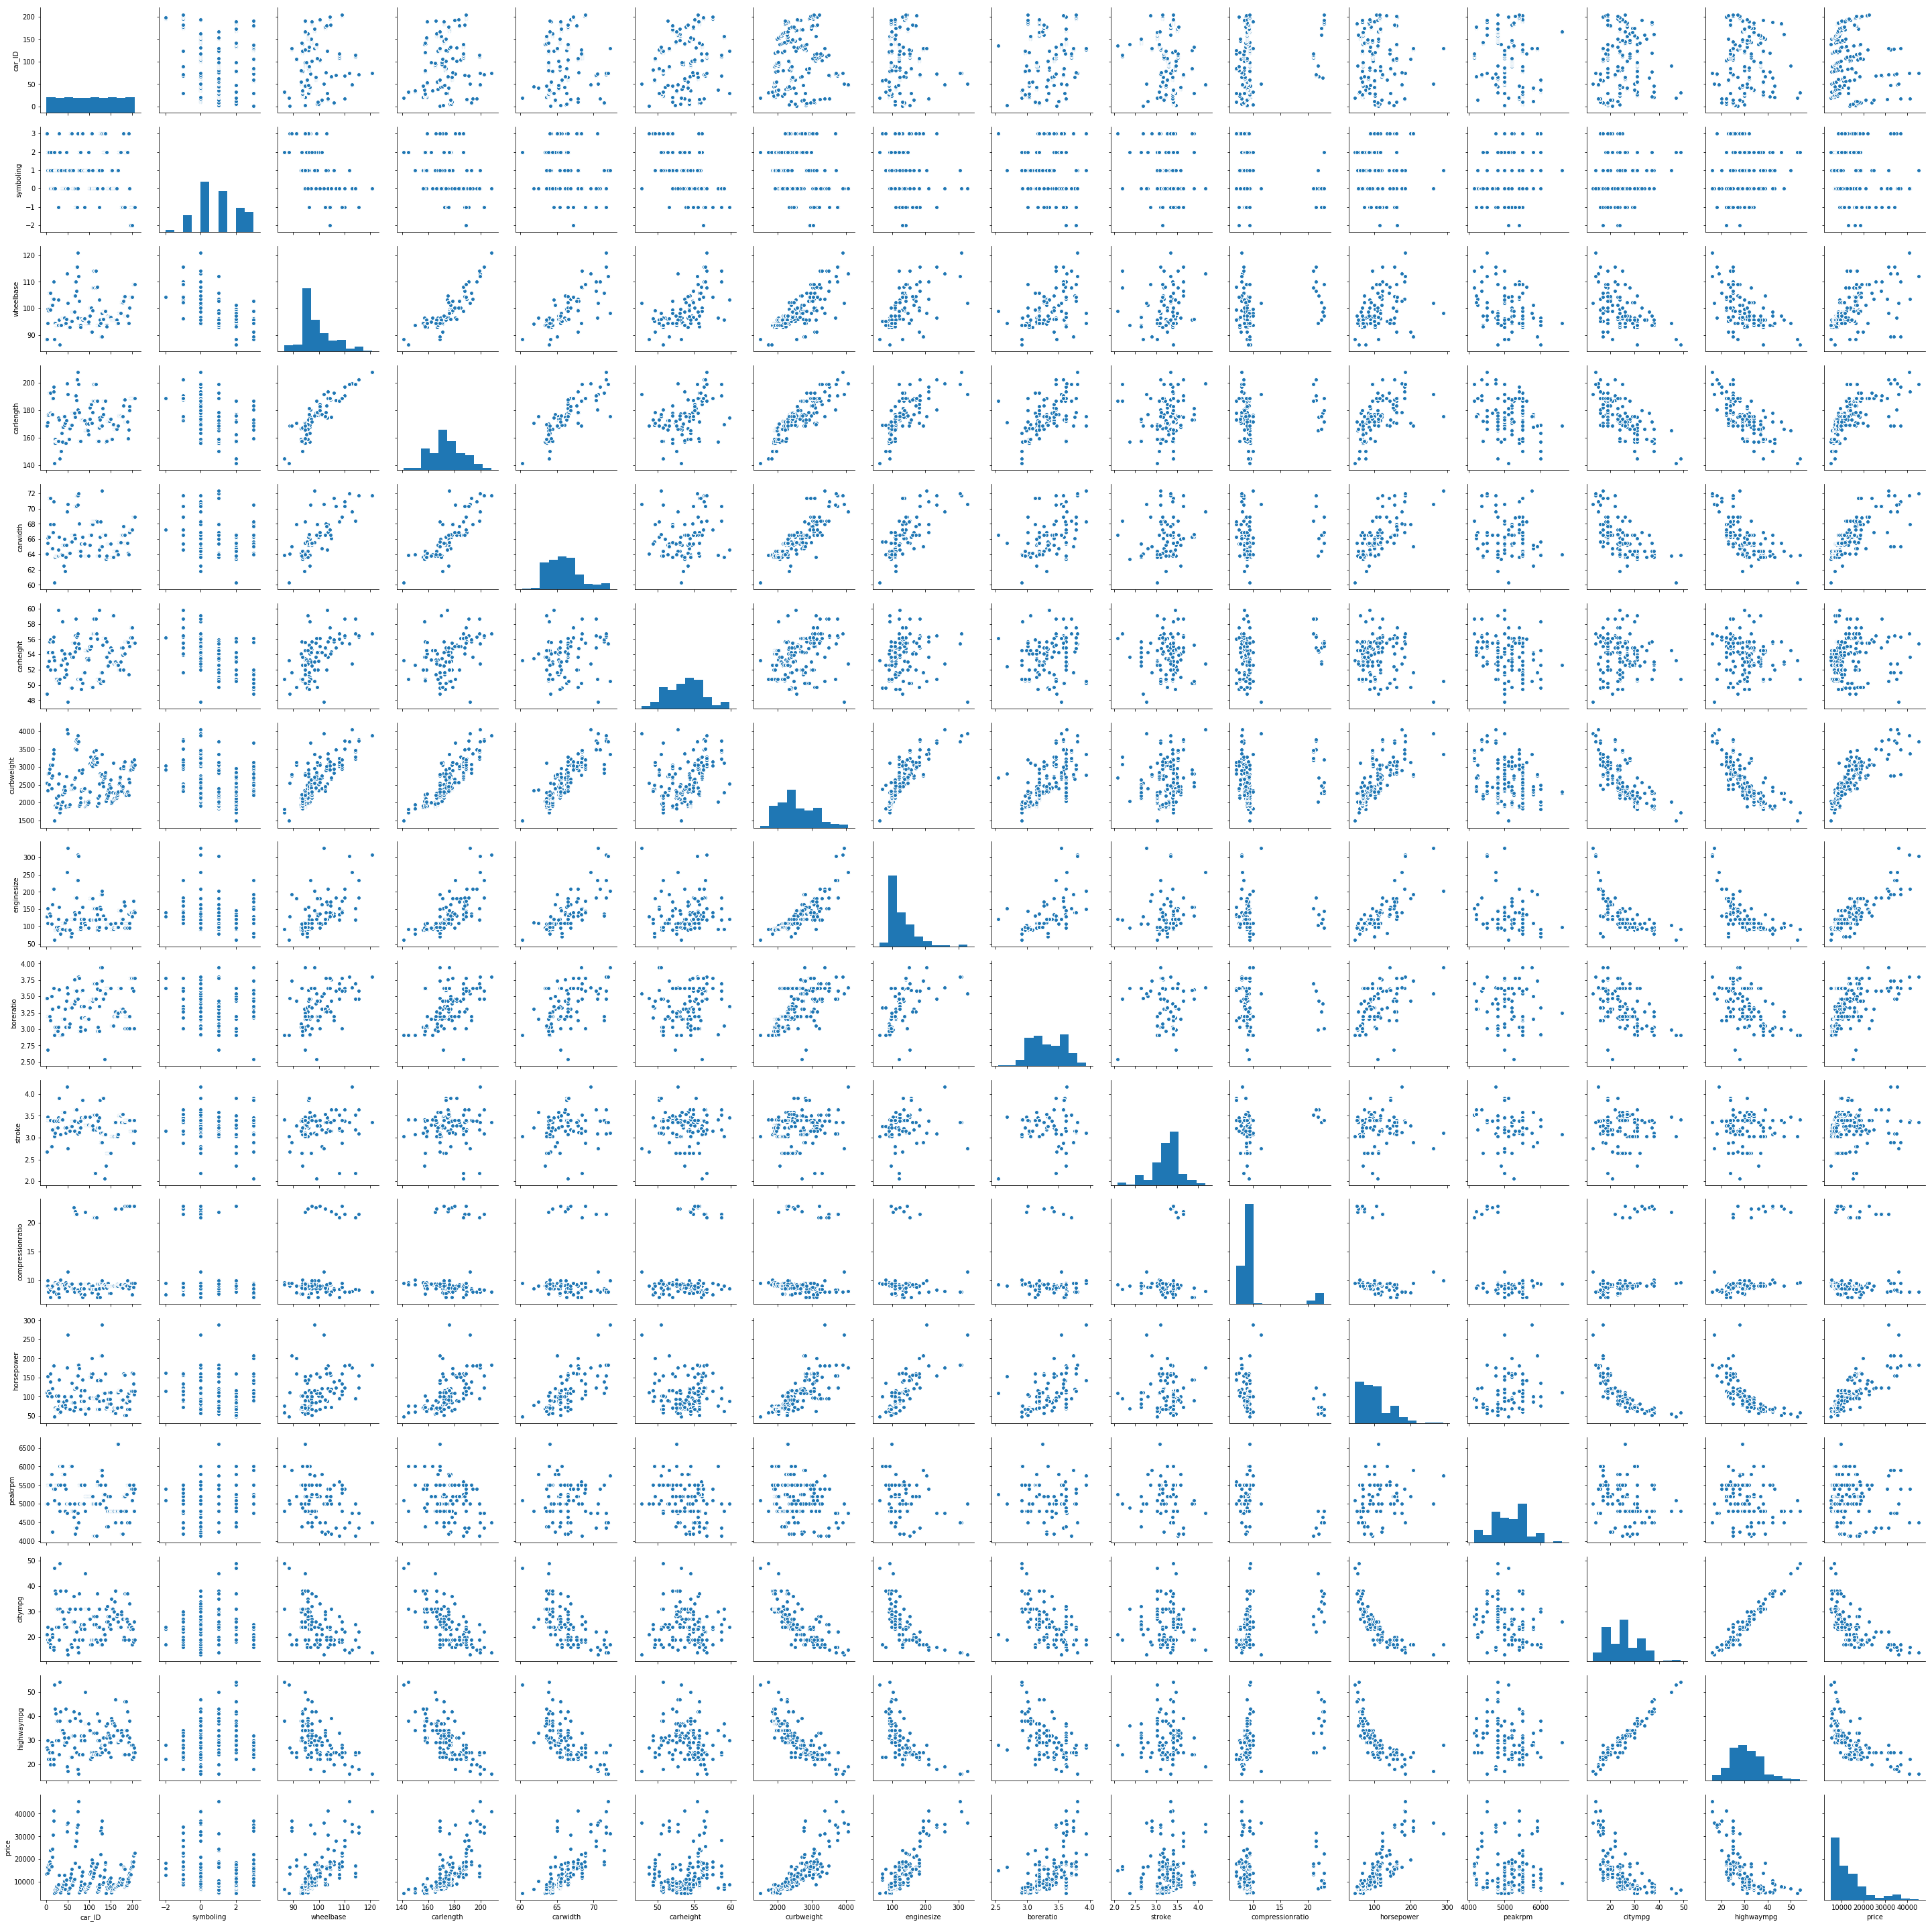

In [18]:
sns.pairplot(CarPrice)
plt.show()

#### Visualising Categorical Variables

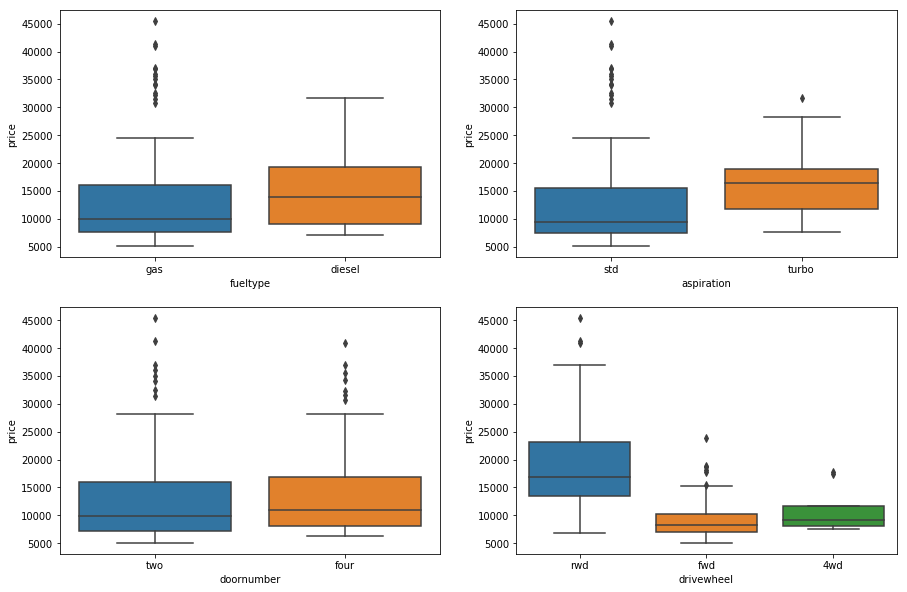

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(2,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(2,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(2,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.show()

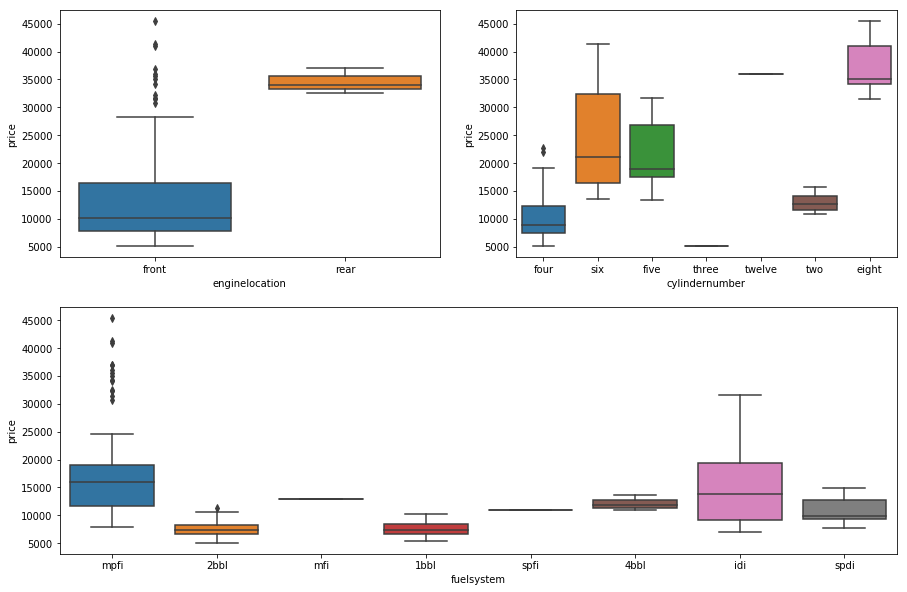

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(2,2,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(2,1,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.show()

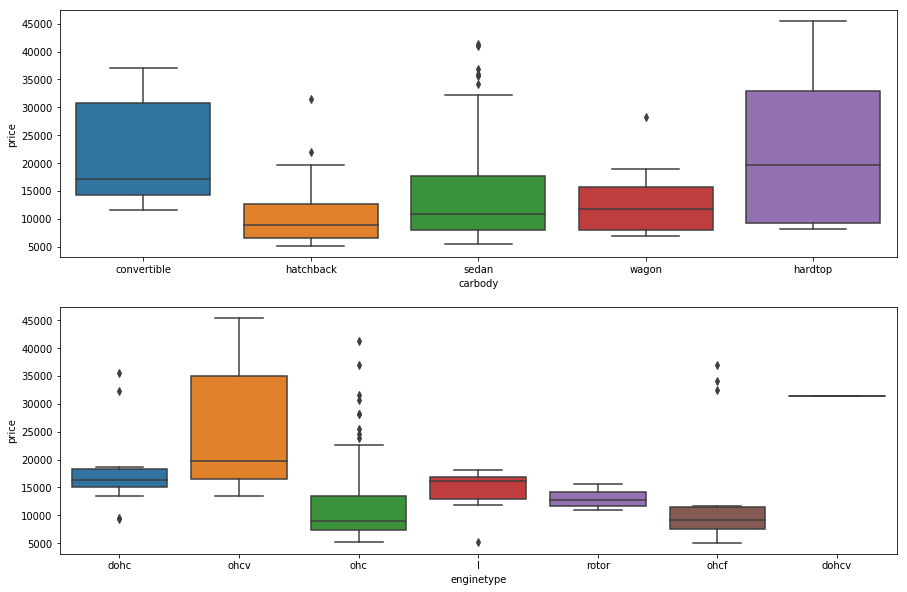

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(2,1,2)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.show()

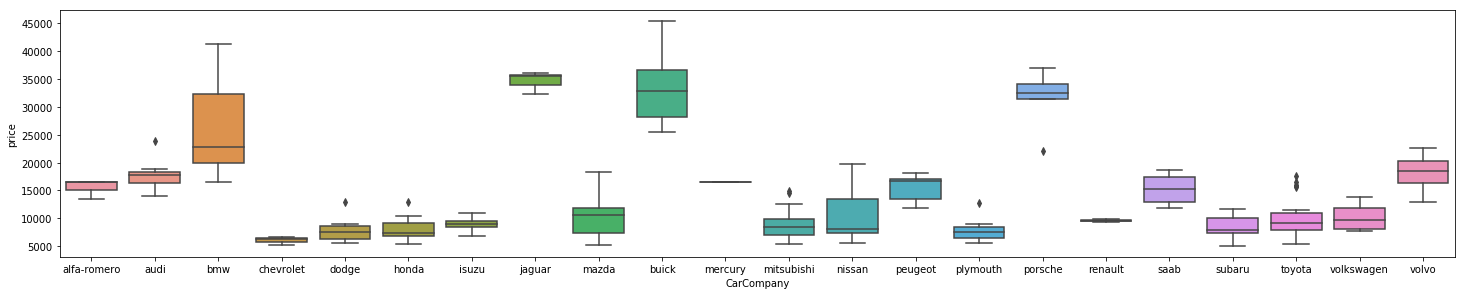

In [22]:
plt.figure(figsize=(25, 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'CarCompany', y = 'price', data = CarPrice)

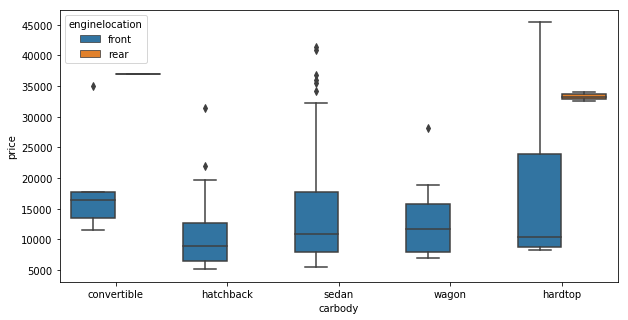

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = CarPrice)
plt.show()

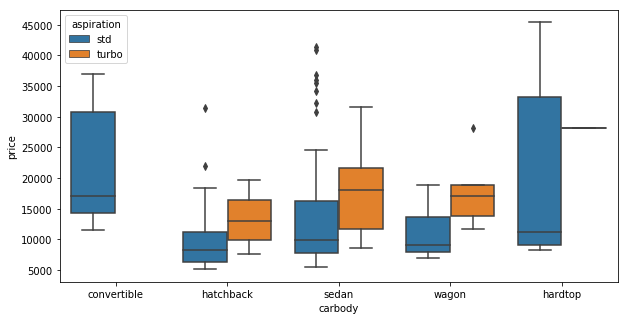

In [24]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'aspiration', data = CarPrice)
plt.show()

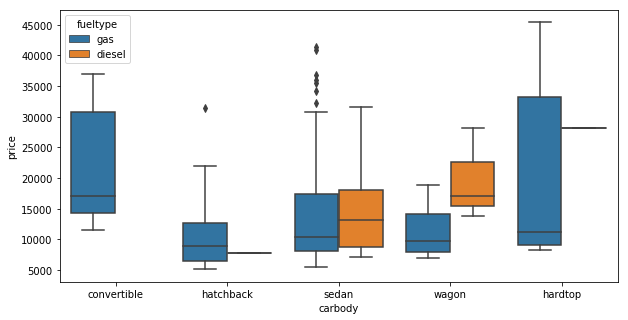

In [25]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = CarPrice)
plt.show()

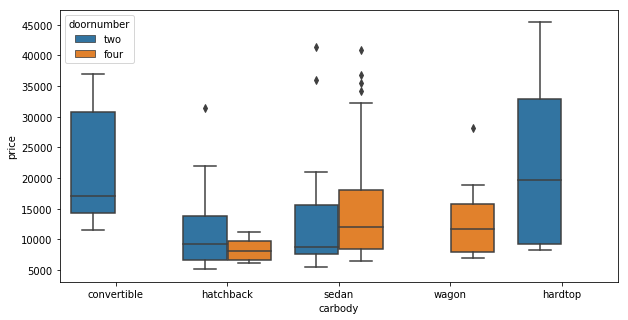

In [26]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'doornumber', data = CarPrice)
plt.show()

In [27]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [28]:
np.unique(CarPrice.carbody)

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

## 3. Data Preparation

###### a. Removing CarModel column 
###### b.To plot a regression line, creating dummies for categorical values 

In [31]:
CarPrice.drop(['CarModel'], axis = 1, inplace = True)

In [36]:
CarPricedummies = pd.get_dummies(CarPrice)

In [38]:
CarPricedummies.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke        ...         CarCompany_nissan  \
0         130       3.47    2.68        ...                         0   
1         130       3.47    2.68        ...                         0   
2         152       2.68    3.47        ...                         0   
3         109       3.19    3.40        ...                         0   
4         136       3.19    3.40        ...                         0   

   CarCompany_peugeot  CarCompany_plymouth  CarCompany_porsche  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   CarCompany_renault  CarCompany_saab  CarCompany_subaru  CarCompany_toyota  \
0                   0                0                  0                  0   
1                   0                0                  0                  0   
2                   0                0                  0                  0   
3                   0                0                  0                  0   
4                   0                0                  0                  0   

   CarCompany_volkswagen  CarCompany_volvo  
0                      0                 0  
1                      0                 0  
2                      0                 0  
3                      0                 0  
4                      0                 0  

[5 rows x 76 columns]

In [44]:
CarPricedummies.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [43]:
CarPricedummies.drop(['car_ID'], axis = 1, inplace = True)

## 4. Splitting Data into Training and Testing Dataset

In [110]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
cpd_train, cpd_test = train_test_split(CarPricedummies, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features
###### So the units of the coefficients obtained are all on the same scale

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
cpd_train.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
122          1       93.7      167.3      63.8       50.8        2191   
125          3       94.5      168.9      68.3       50.2        2778   
166          1       94.5      168.7      64.0       52.6        2300   
1            3       88.6      168.8      64.1       48.8        2548   
199         -1      104.3      188.8      67.2       57.5        3157   

     enginesize  boreratio  stroke  compressionratio        ...         \
122          98       2.97    3.23               9.4        ...          
125         151       3.94    3.11               9.5        ...          
166          98       3.24    3.08               9.4        ...          
1           130       3.47    2.68               9.0        ...          
199         130       3.62    3.15               7.5        ...          

     CarCompany_nissan  CarCompany_peugeot  CarCompany_plymouth  \
122                  0                   0                    1   
125                  0                   0                    0   
166                  0                   0                    0   
1                    0                   0                    0   
199                  0                   0                    0   

     CarCompany_porsche  CarCompany_renault  CarCompany_saab  \
122                   0                   0                0   
125                   1                   0                0   
166                   0                   0                0   
1                     0                   0                0   
199                   0                   0                0   

     CarCompany_subaru  CarCompany_toyota  CarCompany_volkswagen  \
122                  0                  0                      0   
125                  0                  0                      0   
166                  0                  1                      0   
1                    0                  0                      0   
199                  0                  0                      0   

     CarCompany_volvo  
122                 0  
125                 0  
166                 0  
1                   0  
199                 1  

[5 rows x 75 columns]

In [114]:
numeric = ['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio',
           'horsepower','peakrpm','citympg','highwaympg','price']

cpd_train[numeric] = scaler.fit_transform(cpd_train[numeric])

In [115]:
cpd_train.describe()

symboling   wheelbase   carlength    carwidth   carheight  curbweight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.559441    0.411141    0.525476    0.461655    0.509004    0.407878   
std      0.239200    0.205581    0.204848    0.184517    0.215378    0.211269   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.272414    0.399187    0.304167    0.353982    0.245539   
50%      0.600000    0.341379    0.502439    0.425000    0.522124    0.355702   
75%      0.600000    0.503448    0.669919    0.550000    0.668142    0.559542   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       enginesize   boreratio      stroke  compressionratio        ...         \
count  143.000000  143.000000  143.000000        143.000000        ...          
mean     0.241351    0.497946    0.535389          0.190787        ...          
std      0.154619    0.207140    0.157843          0.237181        ...          
min      0.000000    0.000000    0.000000          0.000000        ...          
25%      0.135849    0.305556    0.464646          0.100000        ...          
50%      0.184906    0.500000    0.545455          0.125000        ...          
75%      0.301887    0.682540    0.611111          0.150000        ...          
max      1.000000    1.000000    1.000000          1.000000        ...          

       CarCompany_nissan  CarCompany_peugeot  CarCompany_plymouth  \
count         143.000000          143.000000           143.000000   
mean            0.097902            0.055944             0.027972   
std             0.298227            0.230621             0.165472   
min             0.000000            0.000000             0.000000   
25%             0.000000            0.000000             0.000000   
50%             0.000000            0.000000             0.000000   
75%             0.000000            0.000000             0.000000   
max             1.000000            1.000000             1.000000   

       CarCompany_porsche  CarCompany_renault  CarCompany_saab  \
count          143.000000          143.000000       143.000000   
mean             0.020979            0.013986         0.020979   
std              0.143818            0.117845         0.143818   
min              0.000000            0.000000         0.000000   
25%              0.000000            0.000000         0.000000   
50%              0.000000            0.000000         0.000000   
75%              0.000000            0.000000         0.000000   
max              1.000000            1.000000         1.000000   

       CarCompany_subaru  CarCompany_toyota  CarCompany_volkswagen  \
count         143.000000         143.000000             143.000000   
mean            0.076923           0.139860               0.048951   
std             0.267406           0.348061               0.216524   
min             0.000000           0.000000               0.000000   
25%             0.000000           0.000000               0.000000   
50%             0.000000           0.000000               0.000000   
75%             0.000000           0.000000               0.000000   
max             1.000000           1.000000               1.000000   

       CarCompany_volvo  
count        143.000000  
mean           0.041958  
std            0.201198  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 75 columns]

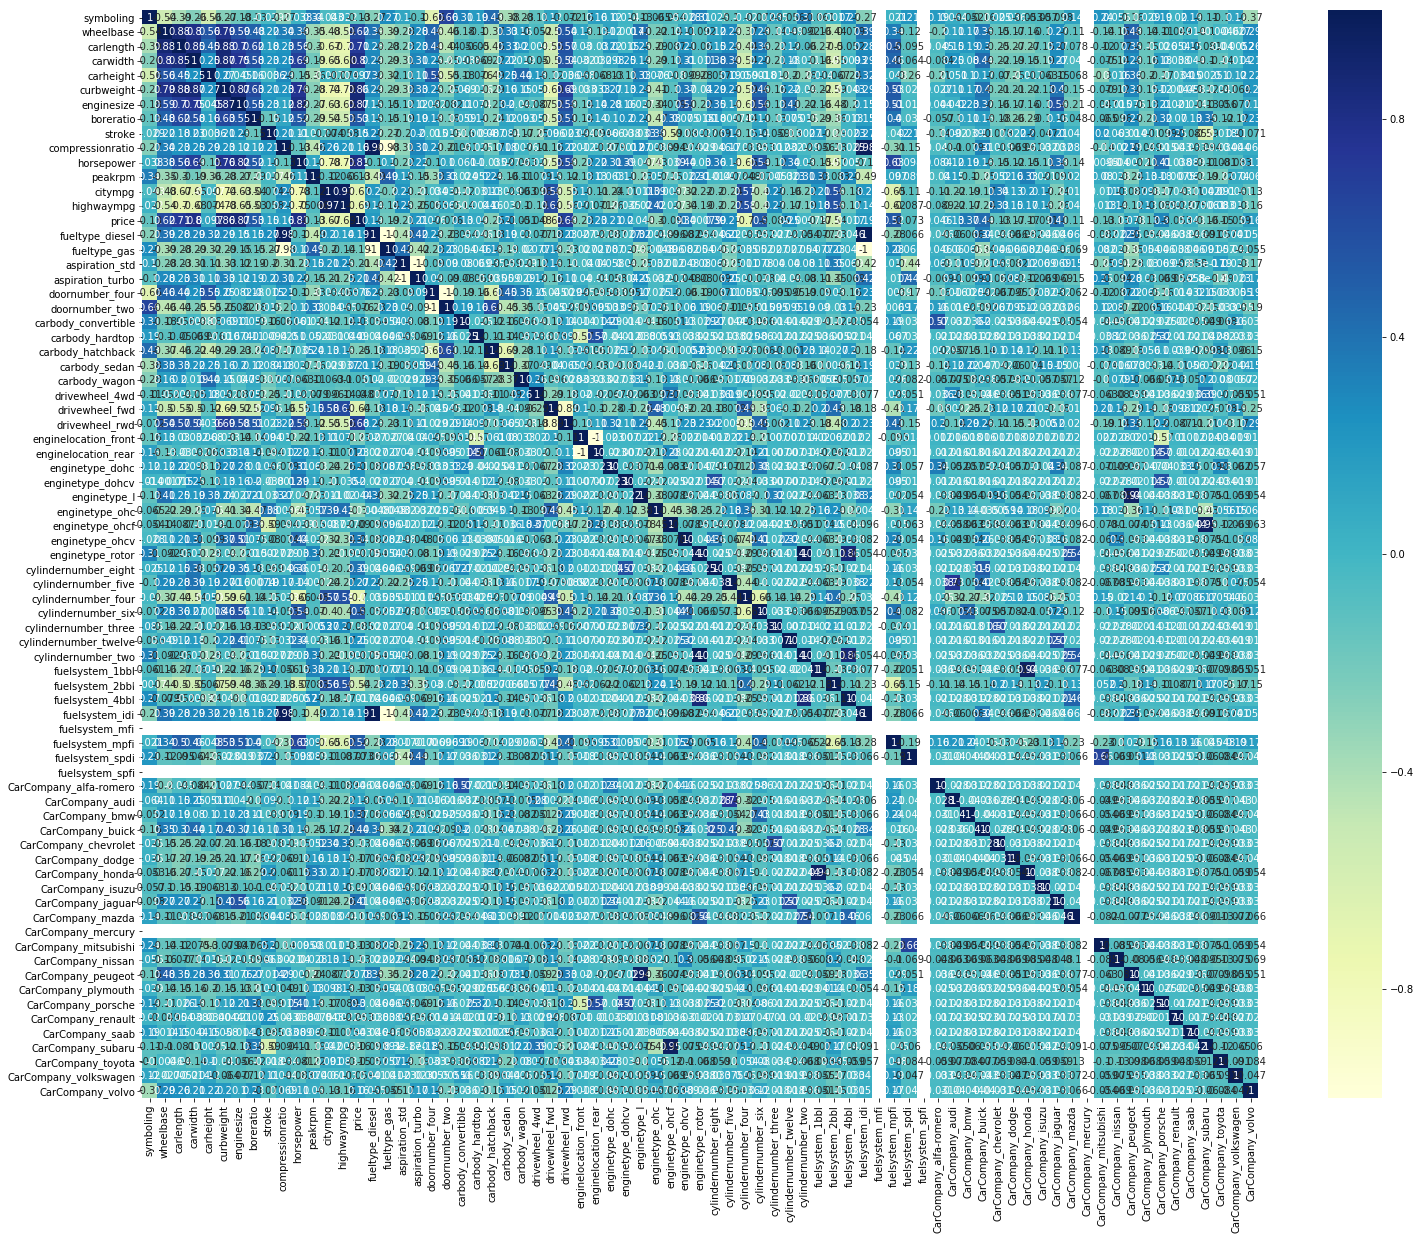

In [116]:
#Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(cpd_train.corr(),  annot = True,cmap="YlGnBu")
plt.show()

In [117]:
cpd_train1 = cpd_train.copy()

In [118]:
cpd_train1.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
122        0.6   0.244828   0.426016  0.291667   0.265487    0.272692   
125        1.0   0.272414   0.452033  0.666667   0.212389    0.500388   
166        0.6   0.272414   0.448780  0.308333   0.424779    0.314973   
1          1.0   0.068966   0.450407  0.316667   0.088496    0.411171   
199        0.2   0.610345   0.775610  0.575000   0.858407    0.647401   

     enginesize  boreratio    stroke  compressionratio        ...         \
122    0.139623   0.230159  0.525253           0.15000        ...          
125    0.339623   1.000000  0.464646           0.15625        ...          
166    0.139623   0.444444  0.449495           0.15000        ...          
1      0.260377   0.626984  0.247475           0.12500        ...          
199    0.260377   0.746032  0.484848           0.03125        ...          

     CarCompany_nissan  CarCompany_peugeot  CarCompany_plymouth  \
122                  0                   0                    1   
125                  0                   0                    0   
166                  0                   0                    0   
1                    0                   0                    0   
199                  0                   0                    0   

     CarCompany_porsche  CarCompany_renault  CarCompany_saab  \
122                   0                   0                0   
125                   1                   0                0   
166                   0                   0                0   
1                     0                   0                0   
199                   0                   0                0   

     CarCompany_subaru  CarCompany_toyota  CarCompany_volkswagen  \
122                  0                  0                      0   
125                  0                  0                      0   
166                  0                  1                      0   
1                    0                  0                      0   
199                  0                  0                      0   

     CarCompany_volvo  
122                 0  
125                 0  
166                 0  
1                   0  
199                 1  

[5 rows x 75 columns]

In [119]:
# Checking co-relation without company name, Fuelsystem to get a clear idea

cpd_train1.drop(['fuelsystem_1bbl','fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi',
'fuelsystem_spdi','fuelsystem_spfi','CarCompany_alfa-romero',
'CarCompany_audi','CarCompany_bmw','CarCompany_buick',
'CarCompany_chevrolet','CarCompany_dodge','CarCompany_honda',
'CarCompany_isuzu','CarCompany_jaguar','CarCompany_mazda',
'CarCompany_mercury','CarCompany_mitsubishi','CarCompany_nissan',
'CarCompany_peugeot','CarCompany_plymouth','CarCompany_porsche',
'CarCompany_renault','CarCompany_saab','CarCompany_subaru',
'CarCompany_toyota','CarCompany_volkswagen','CarCompany_volvo'], axis = 1, inplace = True)

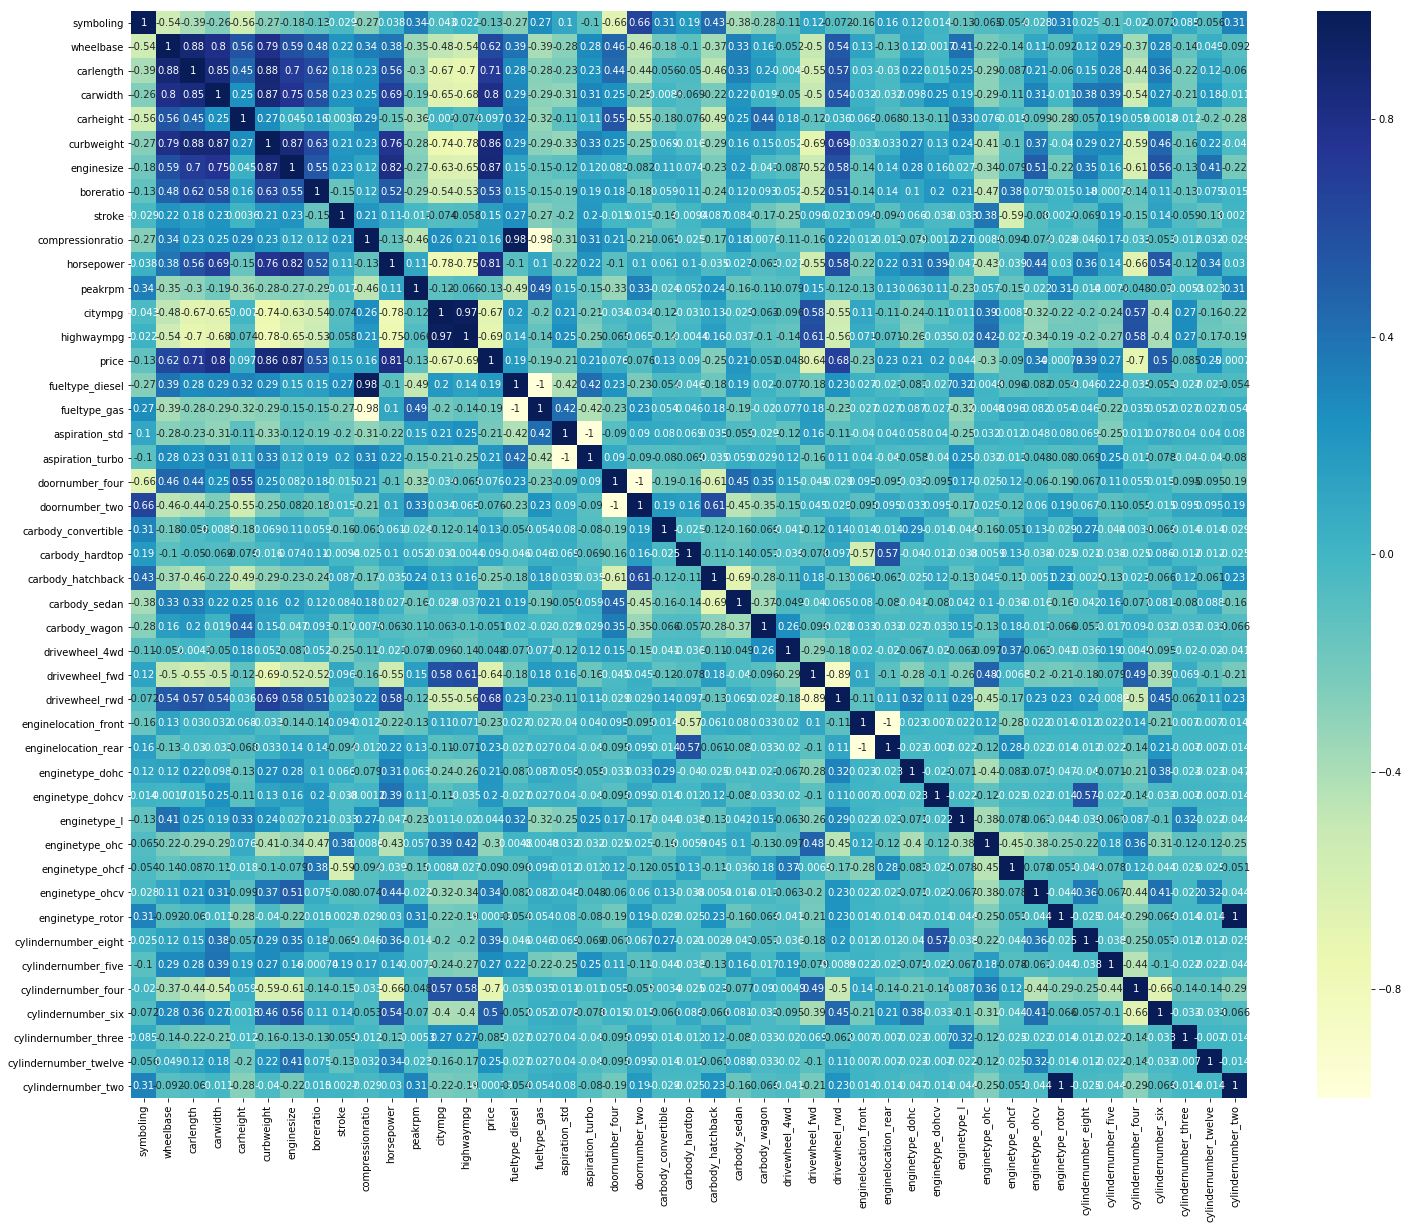

In [120]:
plt.figure(figsize = (25, 20))
sns.heatmap(cpd_train1.corr(),  annot = True,cmap="YlGnBu")
plt.show()

#### Carlength, Carwidth, Curbweight, Enginesize, Horsepower are highly correlated with Price 

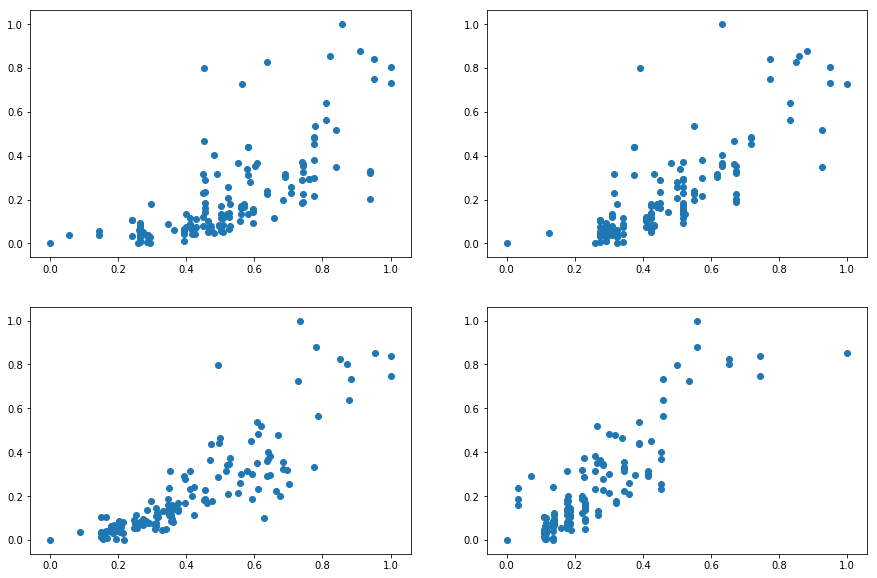

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(x = 'carlength', y = 'price', data = cpd_train1)
plt.subplot(2,2,2)
plt.scatter(x = 'carwidth', y = 'price', data = cpd_train1)
plt.subplot(2,2,3)
plt.scatter(x = 'curbweight', y = 'price', data = cpd_train1)
plt.subplot(2,2,4)
plt.scatter(x = 'enginesize', y = 'price', data = cpd_train1)
plt.show()

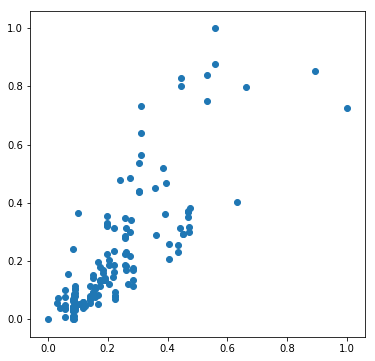

In [68]:
plt.figure(figsize=[6,6])
plt.scatter(cpd_train1.horsepower, cpd_train1.price)
plt.show()

In [ ]:
#It seems engine size is more correlated to price

###### Dividing into X and Y sets for the model building

In [121]:
y_train = cpd_train1.pop('price')
X_train = cpd_train1

## 5. Building a linear model

In [123]:
import statsmodels.api as sm

In [124]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [125]:
# Checking the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

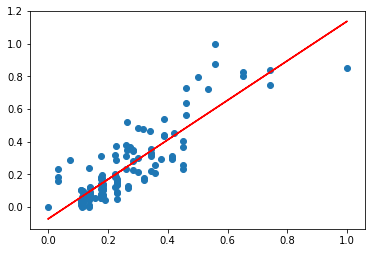

In [128]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072 + 1.210*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [129]:
# Print summary of the model 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.09e-44
Time:                        19:58:46   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

###### R-squared 0.75 is good but as we have other variables which are higly correlated so we can use those to improve model

In [131]:
#Adding another variable 
X_train_lm = X_train[['enginesize', 'curbweight']]

In [132]:
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [133]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           5.31e-50
Time:                        20:20:46   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

###### Model is improving adding one more variable

In [134]:
#adding horsepower

X_train_lm = X_train[['enginesize', 'curbweight','horsepower']]

In [135]:
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [136]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.16e-51
Time:                        20:23:55   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

###### Adjusted R-square is improved 

In [137]:
#adding carwidth

X_train_lm = X_train[['enginesize', 'curbweight','horsepower','carwidth']]

In [138]:
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.158230
enginesize    0.486169
curbweight    0.245334
horsepower    0.282452
carwidth      0.207804
dtype: float64

In [139]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.91e-51
Time:                        20:26:26   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

###### After adding carwidth we can see there is a change in p-value

In [140]:
#adding carlength

X_train_lm = X_train[['enginesize', 'curbweight','horsepower','carwidth','carlength']]

In [141]:
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.146914
enginesize    0.474561
curbweight    0.326157
horsepower    0.253747
carwidth      0.245682
carlength    -0.099798
dtype: float64

In [142]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.45e-50
Time:                        20:27:50   Log-Likelihood:                 142.79
No. Observations:                 143   AIC:                            -273.6
Df Residuals:                     137   BIC:                            -255.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1469      0.023     -6.258      0.0

#### Verify model performance after adding all columns 

In [143]:
X_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [146]:
X_train_lm = sm.add_constant(X_train)

lr_All = sm.OLS(y_train, X_train_lm).fit()

lr_All.params

const                   -0.046077
symboling                0.021122
wheelbase                0.093635
carlength               -0.070818
carwidth                 0.263949
carheight                0.056271
curbweight               0.075599
enginesize               1.619463
boreratio               -0.328060
stroke                  -0.432929
compressionratio         0.118527
horsepower               0.311845
peakrpm                  0.100816
citympg                 -0.191875
highwaympg               0.252696
fueltype_diesel         -0.043999
fueltype_gas            -0.002078
aspiration_std          -0.042098
aspiration_turbo        -0.003979
doornumber_four         -0.027485
doornumber_two          -0.018592
carbody_convertible      0.066622
carbody_hardtop         -0.051611
carbody_hatchback       -0.037436
carbody_sedan           -0.007234
carbody_wagon           -0.016418
drivewheel_4wd          -0.012147
drivewheel_fwd          -0.039740
drivewheel_rwd           0.005811
enginelocation

In [147]:
print(lr_All.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     51.23
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.52e-52
Time:                        20:32:07   Log-Likelihood:                 222.64
No. Observations:                 143   AIC:                            -373.3
Df Residuals:                     107   BIC:                            -266.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

###### As the p- value suggest some of the variables aren't really significant in the presence of other variables.
###### We can also see the warning message suggesting a strong multicollinearity issue, hence will try to remove the columns using p - value and VIF

#### VIF Validation

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
#Checking variable for all the columns
vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Variable         VIF
22      carbody_hatchback         inf
33         enginetype_ohc         inf
25         drivewheel_4wd         inf
26         drivewheel_fwd         inf
27         drivewheel_rwd         inf
28   enginelocation_front         inf
29    enginelocation_rear         inf
30        enginetype_dohc         inf
31       enginetype_dohcv         inf
32           enginetype_l         inf
34        enginetype_ohcf         inf
23          carbody_sedan         inf
35        enginetype_ohcv         inf
36       enginetype_rotor         inf
37   cylindernumber_eight         inf
38    cylindernumber_five         inf
39    cylindernumber_four         inf
40     cylindernumber_six         inf
41   cylindernumber_three         inf
42  cylindernumber_twelve         inf
24          carbody_wagon         inf
43     cylindernumber_two         inf
20    carbody_convertible         inf
19         doornumber_two         inf
18        doornumber_four         inf
17       aspiration_turbo         inf
16         aspiration_std         inf
15           fueltype_gas         inf
14        fueltype_diesel         inf
21        carbody_hardtop         inf
9        compressionratio  180.460000
6              enginesize  101.440000
5              curbweight   43.770000
13             highwaympg   42.620000
12                citympg   40.940000
10             horsepower   30.240000
2               carlength   18.400000
1               wheelbase   16.640000
7               boreratio   16.560000
3                carwidth   14.350000
8                  stroke    6.830000
4               carheight    3.970000
0               symboling    3.480000
11                peakrpm    3.170000

#### Dropping the variable and updating the model

In [573]:
X = X_train.copy()

In [574]:
# Dropping highly correlated variables and insignificant variables

X.drop(['carbody_hatchback','enginetype_ohc','drivewheel_4wd','drivewheel_fwd','drivewheel_rwd','enginelocation_front'
       ,'cylindernumber_eight','cylindernumber_twelve','stroke','fueltype_gas','fueltype_diesel','carbody_sedan',
'carheight','citympg','doornumber_four','doornumber_two','aspiration_std','wheelbase','peakrpm',
        'carbody_wagon','carlength','curbweight','carbody_convertible','carbody_hardtop',
        'cylindernumber_two','enginetype_l','cylindernumber_three','enginetype_dohcv','enginetype_ohcf','highwaympg',
        'compressionratio','carwidth','symboling','enginetype_ohcv','enginetype_dohc','boreratio','horsepower'
        ,'cylindernumber_five'], axis = 1, inplace = True)


In [575]:
# Build a model again
X_train_lm = sm.add_constant(X)

lr_All2 = sm.OLS(y_train, X_train_lm).fit()


In [576]:
print(lr_All2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           9.20e-51
Time:                        23:03:12   Log-Likelihood:                 145.91
No. Observations:                 143   AIC:                            -277.8
Df Residuals:                     136   BIC:                            -257.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0426    

In [577]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0           enginesize  3.21
5   cylindernumber_six  2.10
4  cylindernumber_four  1.92
1     aspiration_turbo  1.27
2  enginelocation_rear  1.06
3     enginetype_rotor  1.00

###### P-value and VIF are in acceptable range

## 6. Residual Analysis of the train data

###### To check if the error terms are also normally distributed 

In [579]:
y_train_price = lr_All2.predict(X_train_lm)

C:\Users\a.narayanan.nair\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

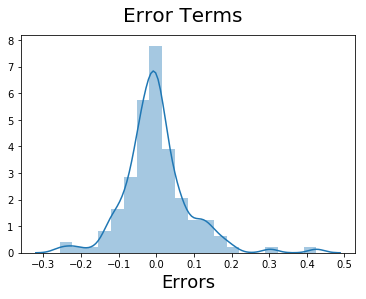

In [580]:
# Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

## 7.Predictions

In [581]:
#Applying the scaling on the test sets
numeric = ['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio',
           'horsepower','peakrpm','citympg','highwaympg','price']

cpd_test[numeric] = scaler.transform(cpd_test[numeric])

In [583]:
cpd_test.drop(['fuelsystem_1bbl','fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi',
'fuelsystem_spdi','fuelsystem_spfi','CarCompany_alfa-romero',
'CarCompany_audi','CarCompany_bmw','CarCompany_buick',
'CarCompany_chevrolet','CarCompany_dodge','CarCompany_honda',
'CarCompany_isuzu','CarCompany_jaguar','CarCompany_mazda',
'CarCompany_mercury','CarCompany_mitsubishi','CarCompany_nissan',
'CarCompany_peugeot','CarCompany_plymouth','CarCompany_porsche',
'CarCompany_renault','CarCompany_saab','CarCompany_subaru',
'CarCompany_toyota','CarCompany_volkswagen','CarCompany_volvo'], axis = 1, inplace = True)

In [584]:
cpd_test.describe()

symboling  wheelbase  carlength   carwidth  carheight  curbweight  \
count  62.000000  62.000000  62.000000  62.000000  62.000000   62.000000   
mean    0.583871   0.437764   0.559481   0.480376   0.559663    0.428470   
std     0.271724   0.212861   0.189947   0.165440   0.215811    0.179488   
min     0.000000   0.000000   0.056911   0.183333   0.141593    0.128394   
25%     0.400000   0.313793   0.459350   0.358333   0.384956    0.305275   
50%     0.600000   0.387931   0.547967   0.441667   0.588496    0.406129   
75%     0.800000   0.570690   0.719919   0.516667   0.699115    0.564876   
max     1.000000   1.182759   1.089431   0.975000   1.061947    0.935609   

       enginesize  boreratio     stroke  compressionratio         ...          \
count   62.000000  62.000000  62.000000         62.000000         ...           
mean     0.265673   0.556580   0.544314          0.209375         ...           
std      0.162820   0.228484   0.160738          0.273690         ...           
min      0.067925  -0.111111  -0.060606          0.000000         ...           
25%      0.177358   0.404762   0.484848          0.093750         ...           
50%      0.226415   0.563492   0.585859          0.125000         ...           
75%      0.316038   0.746032   0.641414          0.150000         ...           
max      0.932075   0.888889   0.863636          1.000000         ...           

       enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
count        62.000000        62.000000              62.0   
mean          0.048387         0.064516               0.0   
std           0.216335         0.247676               0.0   
min           0.000000         0.000000               0.0   
25%           0.000000         0.000000               0.0   
50%           0.000000         0.000000               0.0   
75%           0.000000         0.000000               0.0   
max           1.000000         1.000000               0.0   

       cylindernumber_eight  cylindernumber_five  cylindernumber_four  \
count             62.000000            62.000000            62.000000   
mean               0.032258             0.032258             0.854839   
std                0.178127             0.178127             0.355139   
min                0.000000             0.000000             0.000000   
25%                0.000000             0.000000             1.000000   
50%                0.000000             0.000000             1.000000   
75%                0.000000             0.000000             1.000000   
max                1.000000             1.000000             1.000000   

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count           62.000000                  62.0                   62.0   
mean             0.080645                   0.0                    0.0   
std              0.274512                   0.0                    0.0   
min              0.000000                   0.0                    0.0   
25%              0.000000                   0.0                    0.0   
50%              0.000000                   0.0                    0.0   
75%              0.000000                   0.0                    0.0   
max              1.000000                   0.0                    0.0   

       cylindernumber_two  
count                62.0  
mean                  0.0  
std                   0.0  
min                   0.0  
25%                   0.0  
50%                   0.0  
75%                   0.0  
max                   0.0  

[8 rows x 45 columns]

In [585]:
y_test = cpd_test.pop('price')
X_test = cpd_test

In [587]:
# Adding constant variable to testdf
X_test_Pred = sm.add_constant(X_test)

In [588]:
X_test_Pred.drop(['carbody_hatchback','enginetype_ohc','drivewheel_4wd','drivewheel_fwd','drivewheel_rwd','enginelocation_front'
       ,'cylindernumber_eight','cylindernumber_twelve','stroke','fueltype_gas','fueltype_diesel','carbody_sedan',
'carheight','citympg','doornumber_four','doornumber_two','aspiration_std','wheelbase','peakrpm',
        'carbody_wagon','carlength','curbweight','carbody_convertible','carbody_hardtop',
        'cylindernumber_two','enginetype_l','cylindernumber_three','enginetype_dohcv','enginetype_ohcf','highwaympg',
        'compressionratio','carwidth','symboling','enginetype_ohcv','enginetype_dohc','boreratio','horsepower'
        ,'cylindernumber_five'], axis = 1, inplace = True)


In [589]:
# Making predictions using the final model

y_test_pred = lr_All2.predict(X_test_Pred)

## 8.Model Evaluation

Text(0,0.5,'y_test_pred')

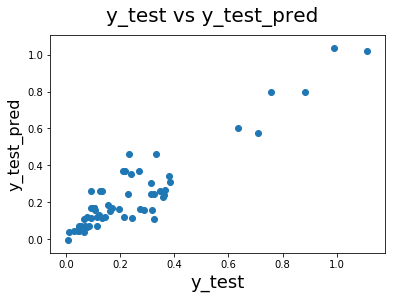

In [591]:
# Plotting y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

#### Equation of our best fitted line is:
###### Price =  enginesize x 1.0672 + aspiration_turbo x 0.0670 + enginelocation_rear x 0.2846 + enginetype_rotor x 0.1294 + cylindernumber_four x -0.1216 + cylindernumber_six x -0.0641

## R-squared score on the test set.

In [592]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.855861329160772